In [35]:
import requests
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
url = 'https://countrymusichalloffame.org/hall-of-fame/members/'
response = requests.get(url)
response.status_code

200

In [9]:
print(type(response))
response.content

<class 'requests.models.Response'>


b'<!DOCTYPE html>\n<html lang="en-US">\n<head>\t\n<!-- Google Tag Manager -->\n\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n\nnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n\nj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n\n\'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n\n})(window,document,\'script\',\'dataLayer\',\'GTM-TVMMMDC\');</script>\n\n<!-- End Google Tag Manager -->\n<meta charset="UTF-8" />\n<meta name=\'viewport\' content=\'width=device-width, initial-scale=1.0\' />\n<meta http-equiv=\'X-UA-Compatible\' content=\'IE=edge\' /><script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={licenseKey:"NRJS-6b1864f7928149029ec",applicationID:"624285542"};window.NREUM||(NREUM={}),__nr_require=function(e,t,n){function r(n){if(!t[n]){var i=t[n]={exports:{}};e[n][0].call(i.exports,function(t){var i=e[n][1][t];return r(i||t)},i,i.exports)}return t[n

In [6]:
content = BeautifulSoup(response.content, 'lxml')
print(content.title.text)

Hall of Fame Members | Country Music Hall of Fame


In [7]:
print(content)

<!DOCTYPE html>
<html lang="en-US">
<head>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':

new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],

j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=

'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);

})(window,document,'script','dataLayer','GTM-TVMMMDC');</script>
<!-- End Google Tag Manager -->
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/><script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={licenseKey:"NRJS-6b1864f7928149029ec",applicationID:"624285542"};window.NREUM||(NREUM={}),__nr_require=function(e,t,n){function r(n){if(!t[n]){var i=t[n]={exports:{}};e[n][0].call(i.exports,function(t){var i=e[n][1][t];return r(i||t)},i,i.exports)}return t[n].exports}if("function"==typeof __nr_require)return _

In [16]:
name = content.find_all('div', attrs = {'class' : 'vertical-card_content--title'})
name

[<div class="vertical-card_content--title">
 <h3>Roy Acuff</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Alabama</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Bill Anderson</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Eddy Arnold</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Chet Atkins</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Gene Autry</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>DeFord Bailey</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Bobby Bare</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Johnny Bond</h3>
 </div>]

In [18]:
years =content.find_all('div', attrs = {'class' : 'vertical-card_content--copy'})
years

[<div class="vertical-card_content--copy">
 <p>
                     Inducted 1962                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 2005                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 2001                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 1966                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 1973                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 1969                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 2005                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 2013                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 1999      

In [22]:
artist_name = []
for i in range(len(name)):
    names_cleaned = name[i].get_text().replace("\n", "").strip()
    artist_name.append(names_cleaned)
print(artist_name)

['Roy Acuff', 'Alabama', 'Bill Anderson', 'Eddy Arnold', 'Chet Atkins', 'Gene Autry', 'DeFord Bailey', 'Bobby Bare', 'Johnny Bond']


In [23]:
inducted_year = []
for i in range(len(years)):
    y_clean= years[i].get_text().replace("\n", "").replace("Inducted", "").strip()
    inducted_year.append(y_clean)
print(inducted_year)

['1962', '2005', '2001', '1966', '1973', '1969', '2005', '2013', '1999']


In [24]:
artist_year = pd.DataFrame(list(zip(artist_name, inducted_year)), columns=['Artist', 'Year'])
artist_year

,Artist,Year
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
5,Gene Autry,1969
6,DeFord Bailey,2005
7,Bobby Bare,2013
8,Johnny Bond,1999


In [32]:
#Teng
artist_pages = []
year_pages = []
web_address_pages = []



for i in range(1,17):      # Number of pages plus one, starting on page 2 cause we already did the first page
    url = 'https://countrymusichalloffame.org/hall-of-fame/members/page/'
    response = requests.get(url + str(i))
    soup = BeautifulSoup(response.content, 'lxml')
    print(url + str(i)) # Watching it print out the url to verify it's working
    
    a = soup.find_all("div", "vertical-card_content--title") # Containter for artists
    c = soup.find_all("div", "vertical-card_content--copy") # Container for year
    d = soup.find_all('div', class_='vertical-card_content') # Container for web address
     
    for element in range(len(a)): # Going through each of the containers 'a' and adding name to my artist lists
        name = a[element].get_text().replace("\n", "").strip()
        artist_pages.append(name)
    
    for element in range(len(c)): # Going through each of the containers 'c' and adding year to my year lists
        year = c[element].get_text().replace("\n", "").replace("Inducted", "").strip()
        year_pages.append(year)
        
    for element in d: # Going through each of the containers 'd' and adding addresses to my web address lists
        link = element.a['href']
        web_address_pages.append(link)

https://countrymusichalloffame.org/hall-of-fame/members/page/1
https://countrymusichalloffame.org/hall-of-fame/members/page/2
https://countrymusichalloffame.org/hall-of-fame/members/page/3
https://countrymusichalloffame.org/hall-of-fame/members/page/4
https://countrymusichalloffame.org/hall-of-fame/members/page/5
https://countrymusichalloffame.org/hall-of-fame/members/page/6
https://countrymusichalloffame.org/hall-of-fame/members/page/7
https://countrymusichalloffame.org/hall-of-fame/members/page/8
https://countrymusichalloffame.org/hall-of-fame/members/page/9
https://countrymusichalloffame.org/hall-of-fame/members/page/10
https://countrymusichalloffame.org/hall-of-fame/members/page/11
https://countrymusichalloffame.org/hall-of-fame/members/page/12
https://countrymusichalloffame.org/hall-of-fame/members/page/13
https://countrymusichalloffame.org/hall-of-fame/members/page/14
https://countrymusichalloffame.org/hall-of-fame/members/page/15
https://countrymusichalloffame.org/hall-of-fame/m

https://betterprogramming.pub/how-to-scrape-multiple-pages-of-a-website-using-a-python-web-scraper-4e2c641cff8

In [65]:
all_data = pd.DataFrame(list(zip(artist_pages, year_pages)), columns=['Artist', 'Year'])
all_data['Year'] = pd.to_datetime(all_data['Year']).dt.year

In [79]:
year_count = all_data.groupby('Year').count().reset_index()
year_count= year_count.rename({'Artist': 'Artist Count'}, axis=1)
year_count.head()

,Year,Artist Count
0,1961,3
1,1962,1
2,1964,1
3,1965,1
4,1966,4


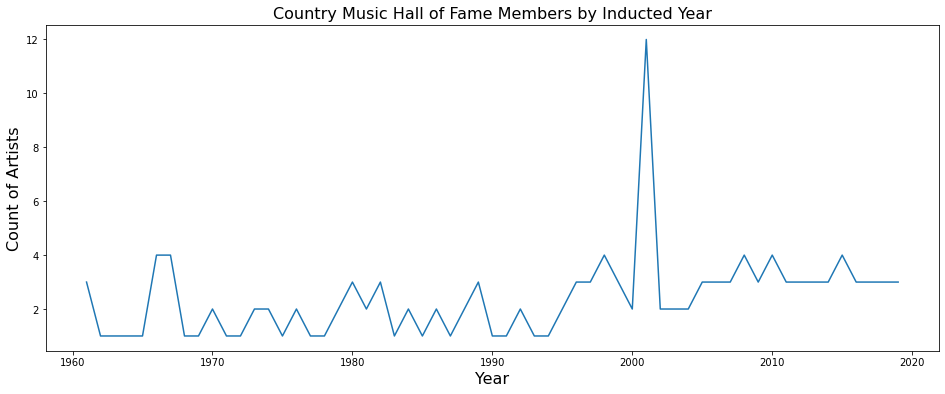

In [100]:
plt.figure(figsize=(16, 6))
fig = sns.lineplot(x='Year', y='Artist Count', data = year_count)
fig.set_xlabel ('Year', fontsize=16)
fig.set_ylabel('Count of Artists',fontsize=16)
fig.set_title('Country Music Hall of Fame Members by Inducted Year', fontsize=16)

plt.savefig('Country Music Hall of Fame Members by Inducted Year')

(array([16., 15., 20., 21., 36., 32.]),
 array([1960, 1970, 1980, 1990, 2000, 2010, 2020]),
 <BarContainer object of 6 artists>)

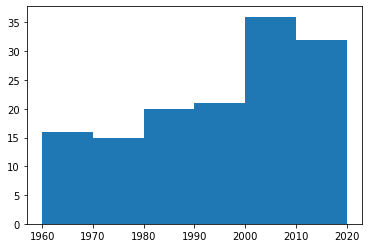

In [67]:
plt.hist("Year", bins = [1960, 1970, 1980, 1990, 2000, 2010, 2020], data = all_data)

(array([18., 16., 17., 21., 36., 32.]),
 array([1961.        , 1970.66666667, 1980.33333333, 1990.        ,
        1999.66666667, 2009.33333333, 2019.        ]),
 <BarContainer object of 6 artists>)

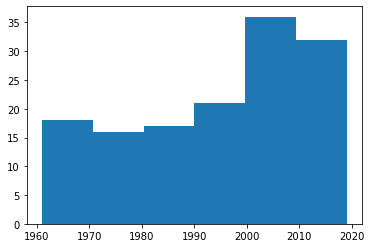

In [89]:
plt.hist("Year", bins = 6, data = all_data)
